In [1]:
%matplotlib inline

import oauth2
from twython import Twython
import simplejson
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from pyquery import PyQuery as pq
from bs4 import BeautifulSoup
import requests
import datetime
import json

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import NoAlertPresentException
import sys

import unittest, time, re

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
#APP_KEY = "qtmevmQ18N1vyWTAXfxqmh4oN"
#APP_SECRET = "MdZibormo3teZPTfMyeLEcuzMURHYidArOml0GtOQyrl6dI13R"

#access_token = '2694571580-Y8DsMjB0iMTGmm3Pwpo6IL3enhhFdAZQSXDIxO8'
#access_secret = 'AYciwyU197r6adpNziDT8pB0tmT3bKIihMrx7SPfbofRO'

#Define Twitter GET function using OAUTH2
#Function from https://dev.twitter.com/oauth/overview/single-user
#def oauth_req(url, key, secret, http_method="GET", post_body="", http_headers=None):
#    consumer = oauth2.Consumer(key=APP_KEY, secret=APP_SECRET)
#    token = oauth2.Token(key=key, secret=secret)
#    client = oauth2.Client(consumer, token)
#    resp, content = client.request( url, method=http_method, body=post_body, headers=http_headers )
#    return content

#twitter = Twython(APP_KEY, APP_SECRET, access_token, access_secret)


In [2]:
#We borrow heavily from http://stackoverflow.com/questions/12519074/scrape-websites-with-infinite-scrolling
def scrape_page(since, until, contestant, \
                base_url="https://twitter.com/search?f=tweets&vertical=default&q=%23thebachelor", \
                pages_to_scroll=3, ):
    
    #### Initiate Chrome Browser #######
    #Must download ChromeDriver executable from https://sites.google.com/a/chromium.org/chromedriver/downloads
    driver = webdriver.Chrome('/Users/dcusworth/chrome_driver/chromedriver') #Specify location of driver
    driver.implicitly_wait(30)
    verificationErrors = []
    accept_next_alert = True

    #Create URL that will get the text
    ender = "&src=typd"
    
    #Use Twitter Sentiment Analysis - REMOVED as it may be underestimating tweets
    #if is_happy:
    #    sentiment = "%20%3A)"
    #else:
    #    sentiment = "%20%3A("
    
    since_time = "%20since%3A" + str(since)
    until_time = "%20until%3A" + str(until)
    contestant_name = "%20" + contestant    
        
    final_url = base_url + contestant_name  + since_time + until_time + ender
    #print final_url
    
    #Jump onto the webpage and scroll down
    delay = 3
    driver.get(final_url)
    for i in range(1,pages_to_scroll):
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(4)
    html_source = driver.page_source
    
    #After scrolling enough times, get the text of the page
    data = html_source.encode('utf-8')
    driver.quit()

    return data

## Week 1 Twitter

In [3]:
contestants = ["Olivia", "Lauren B", "LB", "Caila", "Amber", "Jami", \
               "Jennifer", "Jubilee", "Amanda", "JoJo", "Leah", "Rachel", \
               "Samantha", "Jackie", "Haley", "Emily", "Shushanna", "Lauren H", \
               "Becca", "Mandi", "Lace"]

In [4]:
week1_tweets = {}

for cont in contestants:
    npage = scrape_page("2016-01-04", "2016-01-06", cont, pages_to_scroll=100)

    soup = BeautifulSoup(npage, "html.parser")
    user_tweets = soup.find_all("p", attrs={"class": "TweetTextSize"})

    each_tweet = [uu.get_text() for uu in user_tweets]
    N = len(each_tweet)
    
    week1_tweets.update({cont:N})

In [13]:
#Convert to share
week1_share = {}
N = np.sum(week1_tweets.values())
for cont in week1_tweets.keys():
    week1_share.update({cont:week1_tweets[cont] / float(N)})

#Normalize 0 to 1 scale
tMAX = np.max(week1_tweets.values())
tMIN = np.min(week1_tweets.values())
week1_normalize = {}
for cont in week1_tweets.keys():
    week1_normalize.update({cont: (week1_tweets[cont] - tMIN) / float(tMAX - tMIN)})

In [14]:
with open('week1.json', 'w') as fp:
    json.dump(week1_share, fp)
    
with open('week1n.json', 'w') as fp:
    json.dump(week1_normalize, fp)

In [15]:
week1_normalize

{'Amanda': 0.45792462570986059,
 'Amber': 0.44243675787299946,
 'Becca': 0.0,
 'Caila': 0.050077439339184307,
 'Emily': 0.1357769747031492,
 'Haley': 0.059886422302529684,
 'Jackie': 0.060402684563758392,
 'Jami': 0.056272586473928757,
 'Jennifer': 0.077955601445534331,
 'JoJo': 0.15074858027878163,
 'Jubilee': 0.45224574083634489,
 'LB': 0.051109963861641711,
 'Lace': 1.0,
 'Lauren B': 0.34176561693340218,
 'Lauren H': 0.021166752710376872,
 'Leah': 0.1109963861641714,
 'Mandi': 1.0,
 'Olivia': 0.69024264326277751,
 'Rachel': 0.15694372741352608,
 'Samantha': 0.26897263810015487,
 'Shushanna': 0.1481672689726381}

# Week 2 Twitter

In [5]:
contestants = ["JoJo", "Caila", "LB", "Olivia", "Amanda", "Jubilee", \
               "Lauren B", "Leah", "Becca", "Rachel", "Lace", "Jennifer", \
               "Emily", "Jami", "Lauren H", "Shushanna", "Haley", "Amber"]

week2_tweets = {}

for cont in contestants:
    npage = scrape_page("2016-01-11", "2016-01-13", cont, pages_to_scroll=100)

    soup = BeautifulSoup(npage, "html.parser")
    user_tweets = soup.find_all("p", attrs={"class": "TweetTextSize"})

    each_tweet = [uu.get_text() for uu in user_tweets]
    N = len(each_tweet)
    
    week2_tweets.update({cont:N})
    


In [8]:
#Convert to share
week2_share = {}
N = np.sum(week2_tweets.values())
for cont in week2_tweets.keys():
    week2_share.update({cont:week2_tweets[cont] / float(N)})

#Normalize 0 to 1 scale
tMAX = np.max(week2_tweets.values())
tMIN = np.min(week2_tweets.values())
week2_normalize = {}
for cont in week2_tweets.keys():
    week2_normalize.update({cont: (week2_tweets[cont] - tMIN) / float(tMAX - tMIN)})

In [9]:
with open('week2.json', 'w') as fp:
    json.dump(week2_share, fp)
    
with open('week2n.json', 'w') as fp:
    json.dump(week2_normalize, fp)

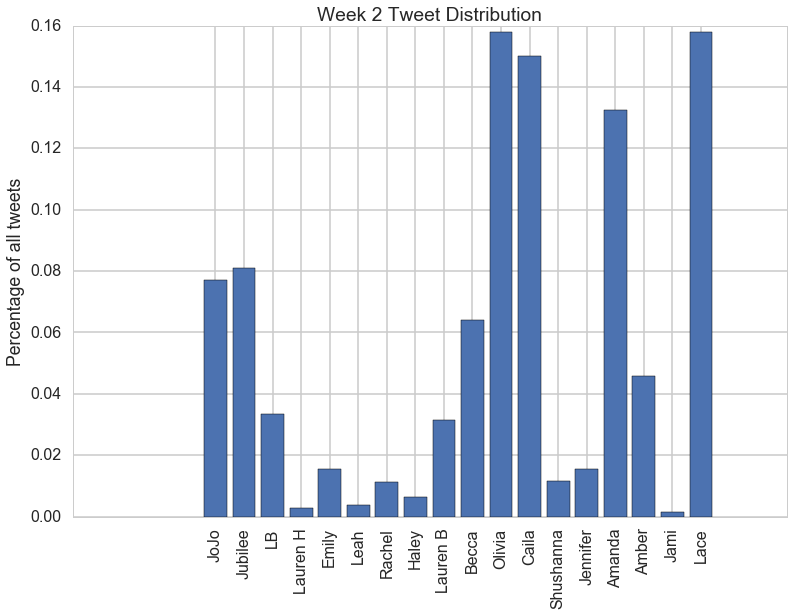

In [12]:
plt.bar(range(len(week2_share)), week2_share.values(), align="center")
plt.xticks(range(len(week2_share)), week2_share.keys(), rotation=90)
plt.title("Week 2 Tweet Distribution")
plt.ylabel("Percentage of all tweets")
plt.show()


# Week 3 Twitter

In [3]:
contestants = ["JoJo", "Caila", "Olivia", "Amanda", "Jubilee", \
               "Lauren B", "Leah", "Becca", "Rachel",  "Jennifer", \
               "Emily",  "Lauren H",  "Haley", "Amber"]

week3_tweets = {}

for cont in contestants:
    npage = scrape_page("2016-01-18", "2016-01-20", cont, pages_to_scroll=100)

    soup = BeautifulSoup(npage, "html.parser")
    user_tweets = soup.find_all("p", attrs={"class": "TweetTextSize"})

    each_tweet = [uu.get_text() for uu in user_tweets]
    N = len(each_tweet)
    
    week3_tweets.update({cont:N})
    

In [4]:
#Convert to share
week3_share = {}
N = np.sum(week3_tweets.values())
for cont in week3_tweets.keys():
    week3_share.update({cont:week3_tweets[cont] / float(N)})

#Normalize 0 to 1 scale
tMAX = np.max(week3_tweets.values())
tMIN = np.min(week3_tweets.values())
week3_normalize = {}
for cont in week3_tweets.keys():
    week3_normalize.update({cont: (week3_tweets[cont] - tMIN) / float(tMAX - tMIN)})
    
with open('week3.json', 'w') as fp:
    json.dump(week3_share, fp)
    
with open('week3n.json', 'w') as fp:
    json.dump(week3_normalize, fp)

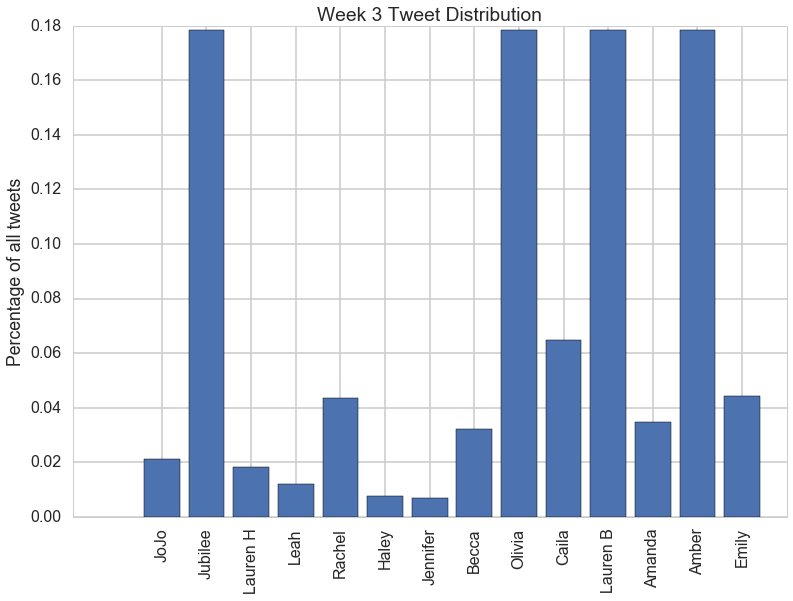

In [5]:
plt.bar(range(len(week3_share)), week3_share.values(), align="center")
plt.xticks(range(len(week3_share)), week3_share.keys(), rotation=90)
plt.title("Week 3 Tweet Distribution")
plt.ylabel("Percentage of all tweets")
plt.show()